# Is Fandango Still Inflating Ratings
In this project, we'll explore the ratings of some of the recent movies  from Fandango to see whether there has been any change in Fandango's rating system after Hickey's report.

In [1]:
import pandas as pd
fandango = pd.read_csv("fandango_score_comparison.csv")
mr_16_17 = pd.read_csv("movie_ratings_16_17.csv")

print(fandango.info(), "\n")
print(mr_16_17.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [3]:
# Filter with useful columns
before = fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
                          'Fandango_votes','Fandango_Difference']].copy()

after = mr_16_17[['movie', 'year', 'fandango']].copy()

print(before.head(), "\n")
print(after.head())

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5   

                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0


As our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis, we are interested in sampling populations from two different periods in time, which are before and after Hickey's analysis.

These two data set are not randomly sampled, they are sampled based on specific criteria based on the specific purpose of the original researche purposes. As a result, these samples are helpful for their researches, but as useful for this project with the purpose mentioned above.

We need to change our goal based on the data sets we currently have as re-collecting required data is difficult at this time. The new goal is to determine whether there is any difference between Fandango's ratingis in 2015 and in 2016 for popular movies.

In [7]:
# Check if bot samples contain popular movies (over 30 fan ratings)
after.sample(20)
# Check from the website

,movie,year,fandango
1,13 Hours,2016,4.5
184,The Legend of Tarzan,2016,4.5
141,Sausage Party,2016,3.5
83,Jane Got a Gun,2016,3.5
99,London Has Fallen,2016,4.5
0,10 Cloverfield Lane,2016,3.5
23,Bitter Harvest,2017,4.5
148,Split,2016,4.0
124,Norm of the North,2016,3.0
65,Hacksaw Ridge,2016,4.5


In [6]:
sum(before["Fandango_votes"] < 30)

0

In [8]:
# Isolate the movies released in 2015 and 2016 in two separate datasets
before["year"] = before["FILM"].str[-5:-1]
before["year"].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [9]:
after["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [14]:
fandango15 = before[before["year"] == "2015"].copy()
fandango16 = after[after["year"] == 2016].copy()
print(fandango15["year"].value_counts(), "\n")
print(fandango16["year"].value_counts())

2015    129
Name: year, dtype: int64 

2016    191
Name: year, dtype: int64


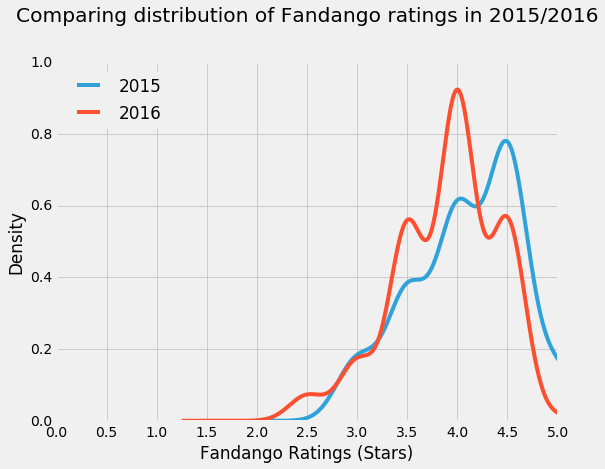

In [19]:
# Generate the kernel density plots for the distribution of movie ratings
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

plt.style.use('fivethirtyeight')

fandango15['Fandango_Stars'].plot.kde(label = "2015", legend = True, figsize = (8, 6))
fandango16['fandango'].plot.kde(label = "2016", legend = True)

plt.title("Comparing distribution of Fandango ratings in 2015/2016", y = 1.1)

plt.xlabel("Fandango Ratings (Stars)")
plt.xlim(0, 5)
plt.xticks(arange(0, 5.5, .5))
plt.show()

Both shapes are left-skewed and the shape for 2016 is shifted more left compared to 2015, which shows relatively lower ratings for popular movies in 2016 than in 2015.

In [26]:
print("2015:", "\n", 
      fandango15["Fandango_Stars"].value_counts(normalize = True).sort_index(), "\n")
print("2016:", "\n", 
      fandango16["fandango"].value_counts(normalize = True).sort_index())

2015: 
 3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64 

2016: 
 2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64


High score movies (4.5 and 5.0) account for approximately 45% in 2015 and only 25% in 2016, while the medium score moveies (3.5 - 4.0) account for 26% in 2015 and a higher 31% in 2016. No movie is rated 2.5 in 2015.

In [29]:
sum_table = pd.DataFrame()
sum_table["2015"] = [fandango15["Fandango_Stars"].mean(),
                     fandango15["Fandango_Stars"].median(),
                     fandango15["Fandango_Stars"].mode()[0]]
sum_table["2016"] = [fandango16["fandango"].mean(),
                     fandango16["fandango"].median(),
                     fandango16["fandango"].mode()[0]]
sum_table.index = ["mean", "median", "mode"]
print(sum_table)

            2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000


In [32]:
diff_ratio = (sum_table.loc["mean"][1] - sum_table.loc["mean"][0]) / sum_table.loc["mean"][0]
print("The average rating in 2016 compared to 2015 decreases by ", diff_ratio)

The average rating in 2016 compared to 2015 decreases by  -0.04842683568951993


In [33]:
plt.style.use('fivethirtyeight')

sum_table['2015'].plot.bar(color = "blue", align = 'center', 
                         label = '2015', width = 0.2, figsize = (8, 6))
sum_table['2016'].plot.bar(color = "red", align = 'edge', label = '2016', width = 0.2)

plt.title("Comparing summary statistics: 2015 vs 2016")
plt.ylim(0, 5.0)
plt.yticks(arange(0, 5.5, 0.5))
plt.ylabel("Stars")
plt.legend(loc = "upper center")
plt.show()

NameError: name 'summary' is not defined